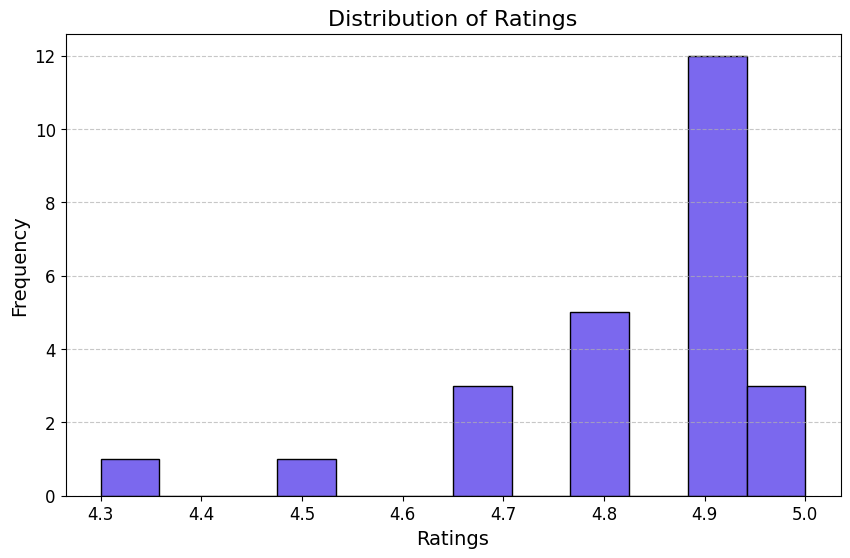

In [ ]:
#histogram
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('/content/engineering contractors.xlsx')
plt.figure(figsize=(10,6))
plt.hist(data['ratings'], bins=12, color='mediumslateblue', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

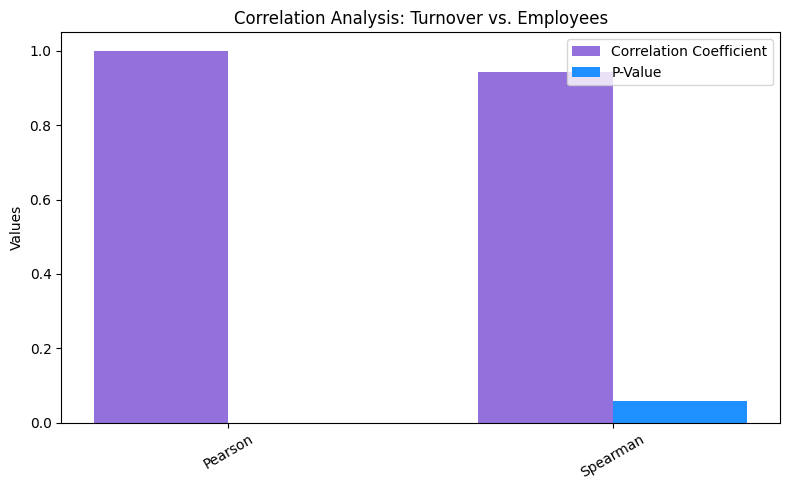

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load data
data = pd.read_excel('engineering contractors.xlsx')

# Cleaning functions
def clean_turnover(value):
    if pd.isna(value): return np.nan
    value = str(value).lower().strip()
    if 'crore' in value:
        nums = [float(s) for s in value.replace('rs.', '').replace('crore', '').split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(nums) * 100 if nums else np.nan
    elif 'lakh' in value:
        nums = [float(s) for s in value.replace('rs.', '').replace('lakh', '').split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(nums) if nums else np.nan
    elif value.replace('.', '').isdigit():
        return float(value)
    return np.nan

def clean_employees(value):
    if pd.isna(value): return np.nan
    value = str(value).lower().strip()
    if 'upto' in value:
        nums = [int(s) for s in value.split() if s.isdigit()]
        return nums[0] if nums else np.nan
    elif '-' in value:
        nums = [int(s) for s in value.split('-') if s.strip().isdigit()]
        return np.mean(nums) if nums else np.nan
    elif 'to' in value:
        nums = [int(s) for s in value.split('to') if s.strip().isdigit()]
        return np.mean(nums) if nums else np.nan
    elif value.isdigit():
        return int(value)
    return np.nan

# Apply cleaning
x_col = 'annual turnover'
y_col = 'total no.of employees'
data[x_col] = data[x_col].apply(clean_turnover)
data[y_col] = data[y_col].apply(clean_employees)
data_cleaned = data.dropna(subset=[x_col, y_col])

# Correlation and plot
if len(data_cleaned) >= 2:
    pearson_corr, pearson_p = pearsonr(data_cleaned[x_col], data_cleaned[y_col])
    spearman_corr, spearman_p = spearmanr(data_cleaned[x_col], data_cleaned[y_col])

    correlation_types = ['Pearson', 'Spearman']
    correlation_coeffs = [pearson_corr, spearman_corr]
    p_values = [pearson_p, spearman_p]

    x = np.arange(len(correlation_types))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(x - width/2, correlation_coeffs, width, label='Correlation Coefficient', color='mediumpurple')
    ax.bar(x + width/2, p_values, width, label='P-Value', color='dodgerblue')

    ax.set_ylabel('Values')
    ax.set_xticks(x)
    ax.set_xticklabels(correlation_types, rotation=30)
    ax.legend()
    plt.title('Correlation Analysis: Turnover vs. Employees')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough valid data points for correlation analysis.")

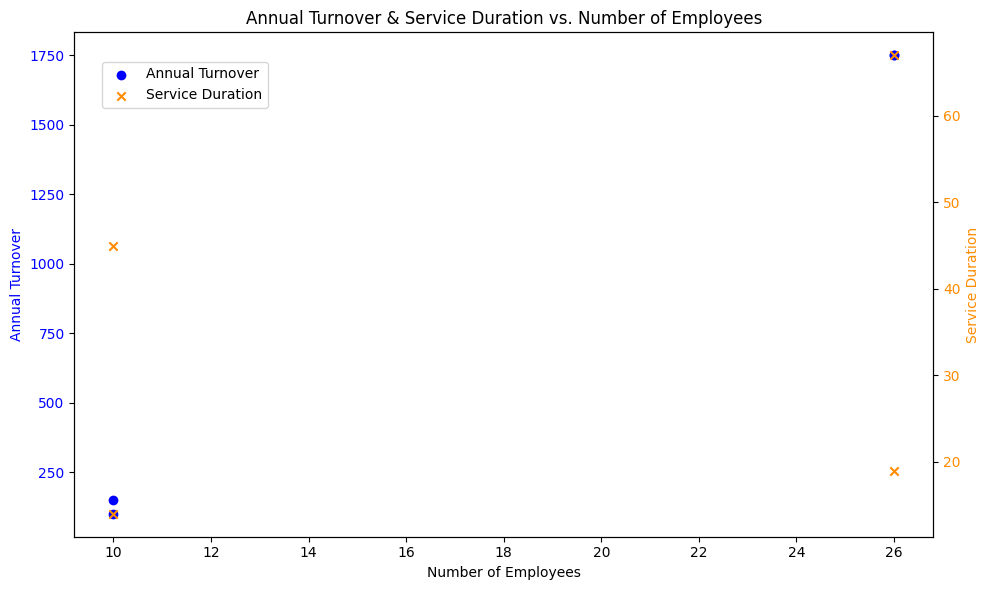

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('engineering contractors.xlsx')

def clean_turnover(value):
    if pd.isna(value): return np.nan
    value = str(value).lower().strip()
    if 'crore' in value:
        nums = [float(s) for s in value.replace('rs.', '').replace('crore', '').split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(nums) * 100 if nums else np.nan
    elif 'lakh' in value:
        nums = [float(s) for s in value.replace('rs.', '').replace('lakh', '').split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(nums) if nums else np.nan
    elif value.replace('.', '').isdigit():
        return float(value)
    return np.nan

def clean_employees(value):
    if pd.isna(value): return np.nan
    value = str(value).lower().strip()
    if 'upto' in value:
        nums = [int(s) for s in value.split() if s.isdigit()]
        return nums[0] if nums else np.nan
    elif '-' in value:
        nums = [int(s) for s in value.split('-') if s.strip().isdigit()]
        return np.mean(nums) if nums else np.nan
    elif 'to' in value:
        nums = [int(s) for s in value.split('to') if s.strip().isdigit()]
        return np.mean(nums) if nums else np.nan
    elif value.isdigit():
        return int(value)
    return np.nan

def clean_founded(value):
    try:
        return int(value)
    except:
        return np.nan


data['annual turnover'] = data['annual turnover'].apply(clean_turnover)
data['total no.of employees'] = data['total no.of employees'].apply(clean_employees)
data['founded'] = data['founded'].apply(clean_founded)


current_year = 2025
data['service duration'] = current_year - data['founded']

data_cleaned = data.dropna(subset=['annual turnover', 'total no.of employees', 'service duration'])
fig, ax1 = plt.subplots(figsize=(10,6))

x = data_cleaned['total no.of employees']
y1 = data_cleaned['annual turnover']
y2 = data_cleaned['service duration']


ax1.scatter(x, y1, color='blue', label='Annual Turnover', marker='o')
ax1.set_xlabel('Number of Employees')
ax1.set_ylabel('Annual Turnover', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.scatter(x, y2, color='darkorange', label='Service Duration', marker='x')
ax2.set_ylabel('Service Duration', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')


fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Annual Turnover & Service Duration vs. Number of Employees')
plt.tight_layout()
plt.show()

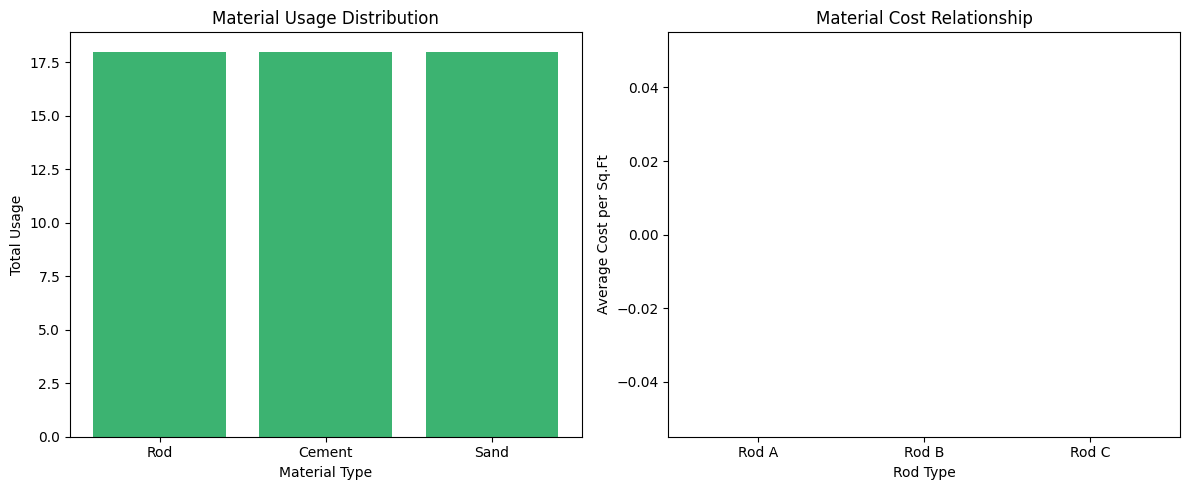

In [10]:
import matplotlib.pyplot as plt
import numpy as np

materials = ['Rod', 'Cement', 'Sand']
usage = [18, 18, 18]
rod_types = ['Rod A', 'Rod B', 'Rod C']
costs = [0, 0, 0]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(materials, usage, color='mediumseagreen')
ax1.set_title('Material Usage Distribution')
ax1.set_xlabel('Material Type')
ax1.set_ylabel('Total Usage')

ax2.bar(rod_types, costs, color='steelblue')
ax2.set_title('Material Cost Relationship')
ax2.set_xlabel('Rod Type')
ax2.set_ylabel('Average Cost per Sq.Ft')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2076958353.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(cities, rotation=45, ha='right')


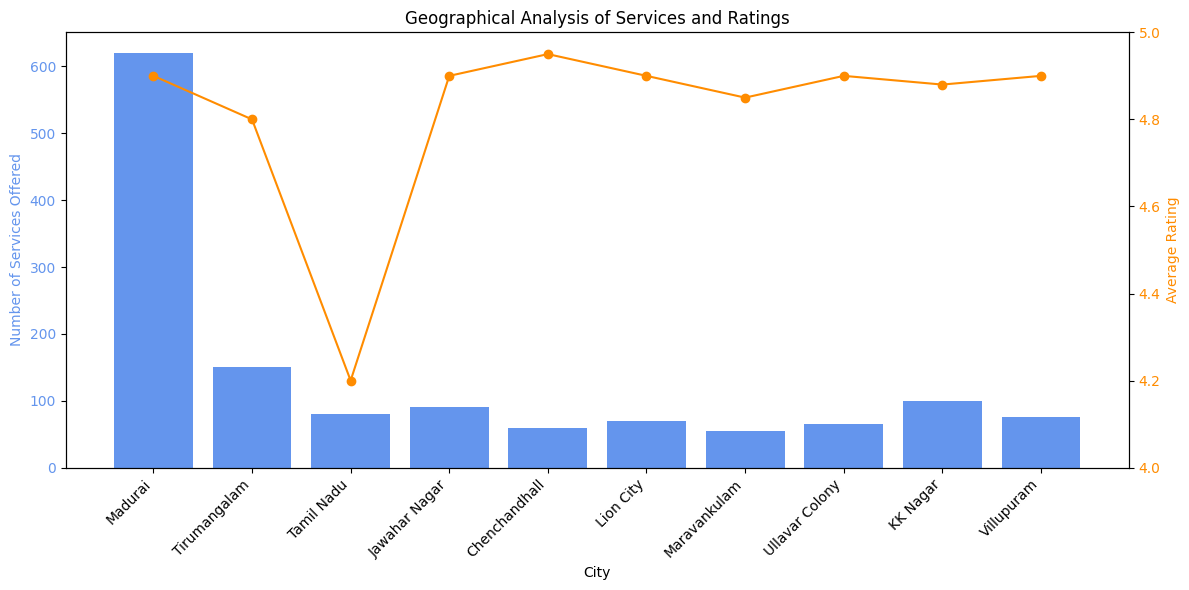

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cities = ['Madurai', 'Tirumangalam', 'Tamil Nadu', 'Jawahar Nagar', 'Chenchandhall',
          'Lion City', 'Maravankulam', 'Ullavar Colony', 'KK Nagar', 'Villupuram']
services_offered = [620, 150, 80, 90, 60, 70, 55, 65, 100, 75]
average_ratings = [4.9, 4.8, 4.2, 4.9, 4.95, 4.9, 4.85, 4.9, 4.88, 4.9]
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(cities, services_offered, color='cornflowerblue', label='Number of Services Offered')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Services Offered', color='cornflowerblue')
ax1.tick_params(axis='y', labelcolor='cornflowerblue')
ax1.set_xticklabels(cities, rotation=45, ha='right')
ax2 = ax1.twinx()
ax2.plot(cities, average_ratings, color='darkorange', marker='o', label='Average Rating')
ax2.set_ylabel('Average Rating', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(4.0, 5.0)
plt.title('Geographical Analysis of Services and Ratings')
fig.tight_layout()
plt.show()

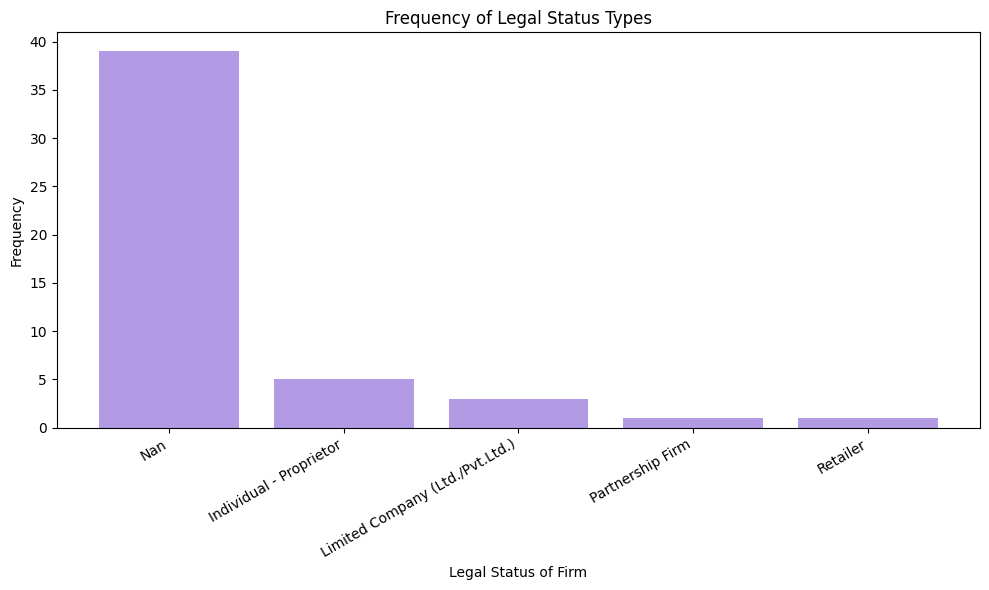

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('engineering contractors.xlsx')
legal_status_col = 'Legal Status of Firm'
data[legal_status_col] = data[legal_status_col].astype(str).str.strip().str.lower()
status_counts = data[legal_status_col].value_counts()
plt.figure(figsize=(10,6))
plt.bar(status_counts.index.str.title(), status_counts.values, color='mediumpurple', alpha=0.7)
plt.xlabel('Legal Status of Firm')
plt.ylabel('Frequency')
plt.title('Frequency of Legal Status Types')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

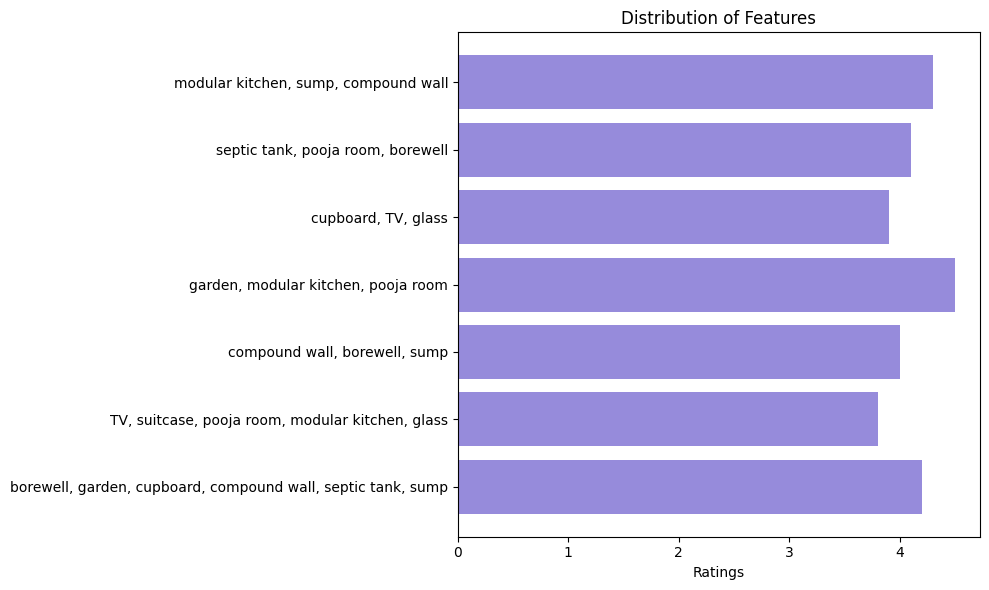

In [13]:
import matplotlib.pyplot as plt


features = [
    'borewell, garden, cupboard, compound wall, septic tank, sump',
    'TV, suitcase, pooja room, modular kitchen, glass',
    'compound wall, borewell, sump',
    'garden, modular kitchen, pooja room',
    'cupboard, TV, glass',
    'septic tank, pooja room, borewell',
    'modular kitchen, sump, compound wall'
]

ratings = [4.2, 3.8, 4.0, 4.5, 3.9, 4.1, 4.3]


plt.figure(figsize=(10,6))
plt.barh(features, ratings, color='slateblue', alpha=0.7)
plt.xlabel('Ratings')
plt.title('Distribution of Features')
plt.tight_layout()
plt.show()

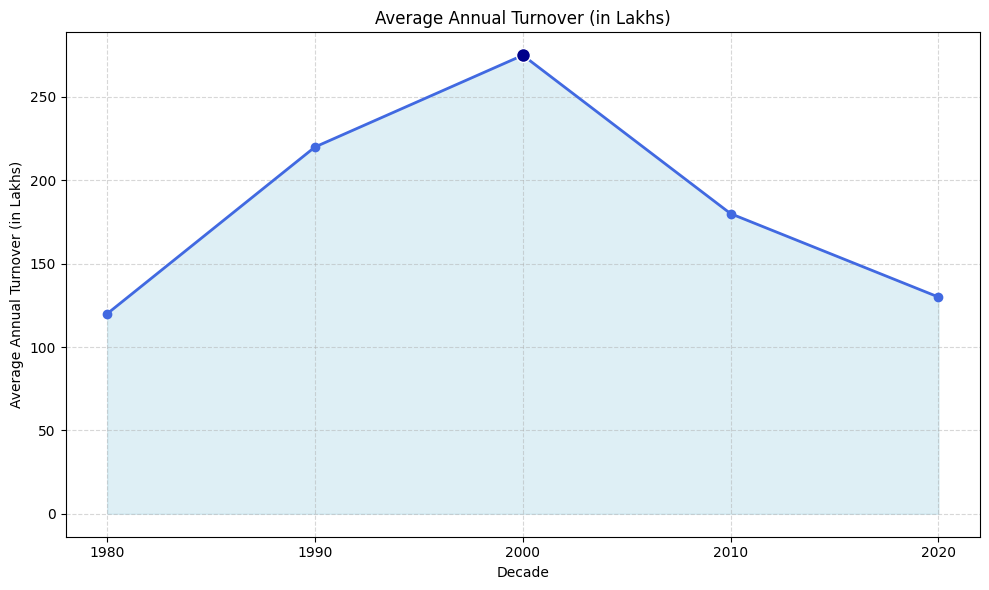

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

decades = ['1980', '1990', '2000', '2010', '2020']
turnover = [120, 220, 275, 180, 130]

plt.figure(figsize=(10,6))
plt.plot(decades, turnover, color='royalblue', marker='o', linewidth=2, label='Turnover')
plt.fill_between(decades, turnover, color='lightblue', alpha=0.4)

peak_index = turnover.index(max(turnover))
plt.scatter(decades[peak_index], turnover[peak_index], color='darkblue', s=100, edgecolors='white', zorder=5)

plt.xlabel('Decade')
plt.ylabel('Average Annual Turnover (in Lakhs)')
plt.title('Average Annual Turnover (in Lakhs)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()